<a href="https://colab.research.google.com/github/deepali2062/-Sentiment-Analysis-Predicting-sentiment-of-COVID-19-tweets/blob/main/Predicting_sentiment_of_COVID_19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/capstone project/Sentiment Analysis : Predicting sentiment of COVID-19 tweets/Coronavirus Tweets.csv',encoding="ISO-8859-1")

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


LOOKING FOR NAN VALUES

In [ ]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

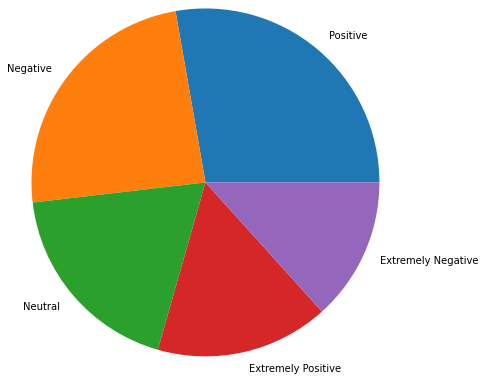

In [ ]:
df_sent = df['Sentiment'].value_counts()

plt.pie(df_sent, labels = df_sent.index,radius=2);

Positive and negative have the highest Sentiment


In [ ]:
#top 10 location 
df_locn = df['Location'].value_counts().head(10)
print(df_locn)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64


In [ ]:
# Plotinh with seaborn top 10 location 
df_top = pd.DataFrame(df_locn.items(),columns=['Country','counts']) #The items() method returns a view object. The view object contains the key-value pairs of the dictionary, as tuples in a list.
df_top

,Country,counts
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


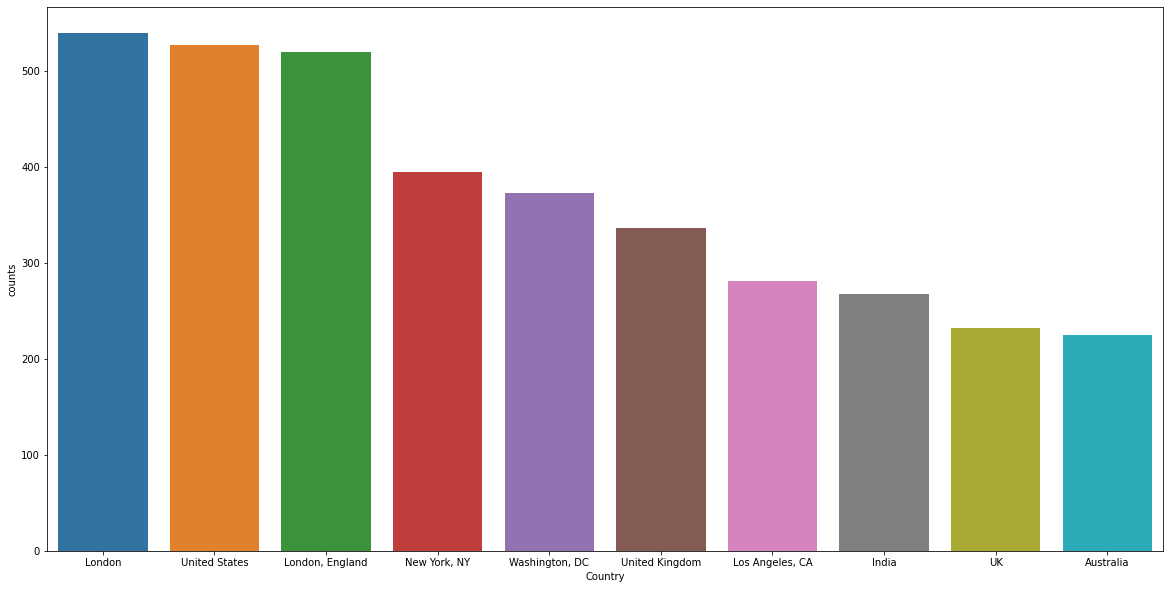

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Country',y='counts',data=df_top)
plt.show()

1. LONDON , UNITED STATE AND ENGLAND HAS THE HIGEST TWEETS SENTIMENT
2. AUSTRALIA AND UK HAS THE LOWEST TEWWTS SENTIMENTS

In [ ]:
df.OriginalTweet

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [ ]:
range(0,len(df.OriginalTweet))

range(0, 41157)

## Text Analysis of tweet

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.8 MB/s 


In [ ]:
import neattext.functions as nfx

In [ ]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['OriginalTweet'].iloc[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

Noise
1. remove mentions/userhandles
2. remove hashtags
3. urls
4. emojis
5. special char

In [ ]:
df['OriginalTweet'].head(10)

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
6    Cashier at grocery store was sharing his insig...
7    Was at the supermarket today. Didn't buy toile...
8    Due to COVID-19 our retail store and classroom...
9    For corona prevention,we should stop to buy th...
Name: OriginalTweet, dtype: object

In [ ]:
df['OriginalTweet'].apply(nfx.extract_hashtags)

0                                                       []
1                                                       []
2                                                       []
3        [#COVID19france, #COVID_19, #COVID19, #coronav...
4        [#COVID19, #coronavirus, #CoronavirusFrance, #...
                               ...                        
41152                                     [#NZ, #COVID-19]
41153                                                   []
41154                         [#coronavirus, #toiletpaper]
41155               [#coronavirus, #COVID19, #coronavirus]
41156                                                   []
Name: OriginalTweet, Length: 41157, dtype: object

In [ ]:
df['extracted_hashtags'] = df['OriginalTweet'].apply(nfx.extract_hashtags)

In [ ]:
df[['extracted_hashtags','OriginalTweet']]

,extracted_hashtags,OriginalTweet
0,[],@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,[],advice Talk to your neighbours family to excha...
2,[],Coronavirus Australia: Woolworths to give elde...
3,"[#COVID19france, #COVID_19, #COVID19, #coronav...",My food stock is not the only one which is emp...
4,"[#COVID19, #coronavirus, #CoronavirusFrance, #...","Me, ready to go at supermarket during the #COV..."
...,...,...
41152,"[#NZ, #COVID-19]",Airline pilots offering to stock supermarket s...
41153,[],Response to complaint not provided citing COVI...
41154,"[#coronavirus, #toiletpaper]",You know itÂs getting tough when @KameronWild...
41155,"[#coronavirus, #COVID19, #coronavirus]",Is it wrong that the smell of hand sanitizer i...


In [ ]:
##Removing Hashtags
df['clean_tweet'] = df['OriginalTweet'].apply(nfx.remove_hashtags)

In [ ]:
df[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the ou..."
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when @KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [ ]:
#Removing Userhandles
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,https://t.co/iFz9FAn2Pa and https://t.co...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the ou..."
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [ ]:
df['clean_tweet'].iloc[15]

'Lines at the grocery store have been unpredictable, but is eating out a safe alternative? \r\r\n\r\r\nFind out more about whether you should be avoiding restaurants right now:  https://t.co/9idZSis5oQ\r\r\n\r\r\n    https://t.co/ZHbh898lf6'

In [ ]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
df['clean_tweet'].iloc[15]

'Lines at the grocery store have been unpredictable, but is eating out a safe alternative? Find out more about whether you should be avoiding restaurants right now: https://t.co/9idZSis5oQ https://t.co/ZHbh898lf6'

In [ ]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
df[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Me ready to go at supermarket during the outbr...
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when is rationing...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [ ]:
#df['Sentiment_1'] = df['Sentiment'] #for not affecting a data we cremated a new column 

In [ ]:
df.head(1)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,extracted_hashtags,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],and and


In [ ]:
### Keyword Extraction
#positive_tweet = df[df['Sentiment_1'] == 'Positive']['clean_tweet']
#neutral_tweet = df[df['Sentiment_1'] == 'Neutral']['clean_tweet']
#negative_tweet = df[df['Sentiment_1'] == 'Negative']['clean_tweet']
#ext_positive_tweet =df[df['Sentiment_1'] == 'Extremely Positive']['clean_tweet']
#ext_negative_tweet = df[df['Sentiment_1'] == 'Extremely Negative']['clean_tweet']

In [ ]:
### Keyword Extraction
positive_tweet = df[df['Sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['Sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['Sentiment'] == 'Negative']['clean_tweet']
ext_positive_tweet =df[df['Sentiment'] == 'Extremely Positive']['clean_tweet']
ext_negative_tweet = df[df['Sentiment'] == 'Extremely Negative']['clean_tweet']

In [ ]:
negative_tweet

9        For corona preventionwe should stop to buy thi...
24        what is being done to ensure food and other e...
26       In preparation for higher demand and a potenti...
28       Do you see malicious price increases in NYC Th...
30       There Is of in the Country The more empty shel...
                               ...                        
41127    Today at the grocery store I saw someone getti...
41131    In every human affliction there are gainers an...
41147       YÂall really shitting that much more at home 
41149    Still shocked by the number of supermarket emp...
41156     Well new/used Rift S are going for $70000 on ...
Name: clean_tweet, Length: 9917, dtype: object

In [ ]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
neutral_tweet_list

['',
 'supermarket today Didnt buy toilet paper',
 'month hasnt crowding supermarkets restaurants reducing hours closing malls means entrance dependent single supermarket',
 '13',
 '16MAR20 Russia consumer surveillance watchdog reported case high Arctic man traveled Iran COVID19 101 observed',
 'COVID19 coronavirus pandemic impacting consumer shopping behavior purchase decisions retail sales according Insight study',
 'Retail store closures explode (via',
 'Went supermarket yesterday toilet paper gone Corona virus',
 'Breaking Story: Online clothes shopping rises people find mysterious white patches forming clothes',
 'line outside customers wait store open morning',
 'COVID19 restrictions sparking run cannabis stores Theyre closed Customers stocking cannabis weekend preparing retail store restrictions coming days',
 'closed remain open emergency store Thank retail workers',
 'thoughts impacts coronavirus food markets',
 '4 masks medical personnel consumer purchase require onceobscure 

In [ ]:
# Tokenization means spliting the words
# for line in positive_tweet_list:
#     print(line)
#    for token in line.split():
#        print(token)          # we are creating a lamda function and loop is running like that

In [ ]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [ ]:
pos_tokens

['advice',
 'Talk',
 'neighbours',
 'family',
 'exchange',
 'phone',
 'numbers',
 'create',
 'contact',
 'list',
 'phone',
 'numbers',
 'neighbours',
 'schools',
 'employer',
 'chemist',
 'GP',
 'set',
 'online',
 'shopping',
 'accounts',
 'poss',
 'adequate',
 'supplies',
 'regular',
 'meds',
 'order',
 'Coronavirus',
 'Australia:',
 'Woolworths',
 'elderly',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'COVID19',
 'outbreak',
 'food',
 'stock',
 'dont',
 'panic',
 'FOOD',
 'need',
 'Stay',
 'calm',
 'stay',
 'safe',
 'news',
 'regionÂ\x92s',
 'confirmed',
 'COVID19',
 'case',
 'came',
 'Sullivan',
 'County',
 'week',
 'people',
 'flocked',
 'area',
 'stores',
 'purchase',
 'cleaning',
 'supplies',
 'hand',
 'sanitizer',
 'food',
 'toilet',
 'paper',
 'goods',
 'reports',
 'Cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'prove',
 'credibility',
 'commented',
 'Im',
 'Civics',
 'class',
 'know',
 'Im',
 'talking',
 'COVID19',
 'retail',
 'store',
 'classroom',

In [ ]:
# Get Most Commonest Keywords
from collections import Counter

In [ ]:
#creating function for getting most common words up to 40
def get_tokens(docx,num=40):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
#creating function for getting most common top 20
def get_top_tokens(docx,num=20):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
get_tokens(pos_tokens)

{'store': 1887,
 'prices': 1842,
 'grocery': 1605,
 'supermarket': 1580,
 'food': 1478,
 'COVID19': 1448,
 'amp': 1418,
 'people': 1269,
 '19': 1018,
 'shopping': 941,
 'online': 907,
 'consumer': 864,
 'like': 861,
 'need': 736,
 'workers': 727,
 'pandemic': 696,
 'hand': 666,
 'help': 656,
 'sanitizer': 630,
 'demand': 614,
 'time': 587,
 'home': 569,
 'stock': 533,
 'COVID': 494,
 'going': 469,
 'work': 424,
 'local': 400,
 'Covid19': 392,
 'stores': 371,
 'paper': 362,
 'Consumer': 362,
 'delivery': 356,
 'know': 350,
 'toilet': 348,
 'buy': 341,
 'shelves': 339,
 'new': 337,
 'staff': 335,
 '2': 318,
 'day': 302}

In [ ]:
get_top_tokens(pos_tokens)

{'store': 1887,
 'prices': 1842,
 'grocery': 1605,
 'supermarket': 1580,
 'food': 1478,
 'COVID19': 1448,
 'amp': 1418,
 'people': 1269,
 '19': 1018,
 'shopping': 941,
 'online': 907,
 'consumer': 864,
 'like': 861,
 'need': 736,
 'workers': 727,
 'pandemic': 696,
 'hand': 666,
 'help': 656,
 'sanitizer': 630,
 'demand': 614}

In [ ]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [ ]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [ ]:
neg_df

,words,scores
0,prices,2148
1,food,1653
2,store,1438
3,supermarket,1426
4,grocery,1225
5,people,1213
6,COVID19,1212
7,amp,1077
8,19,912
9,demand,791


# MOST REPEATED NEGATIVE WORDS

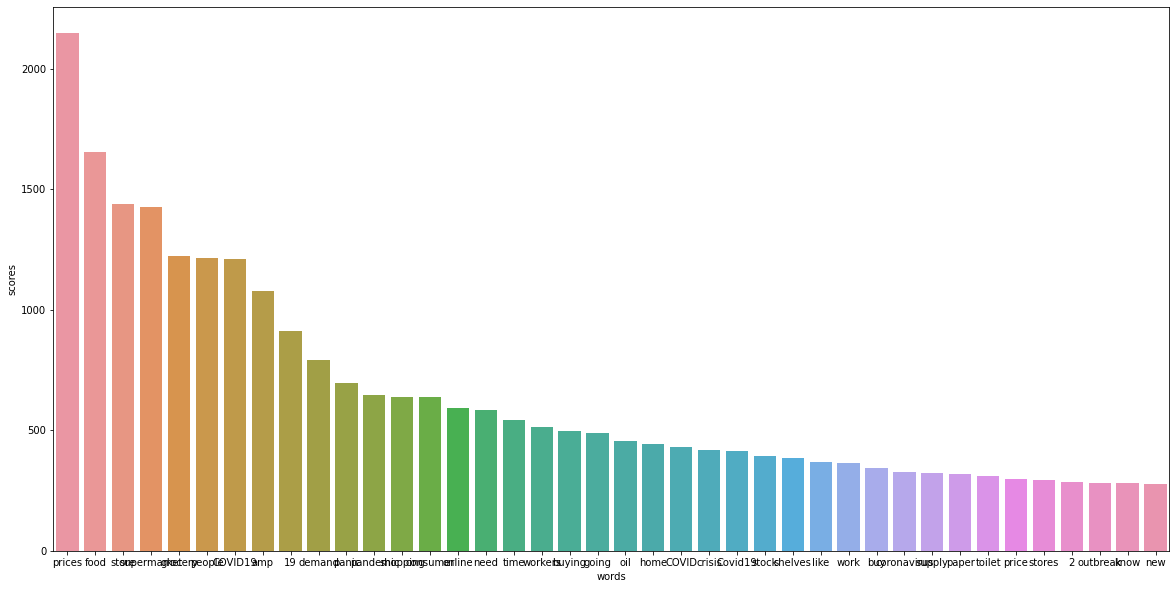

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)

# MOST REPEATED POSITIVE WORDS

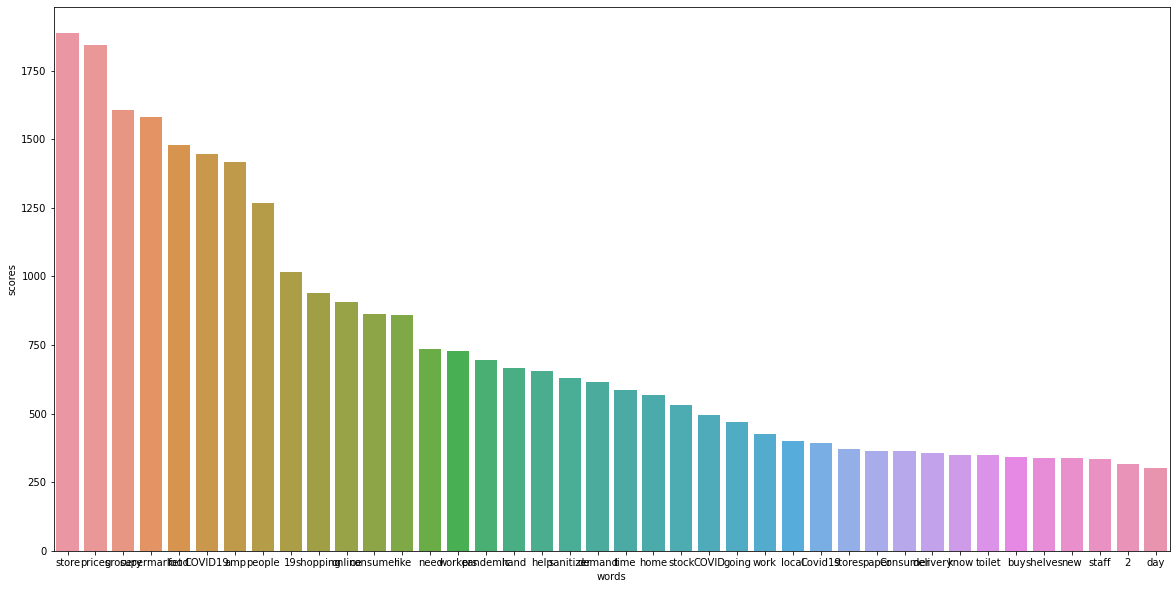

In [ ]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)

# MOST REPEATED POSITIVE WORDS

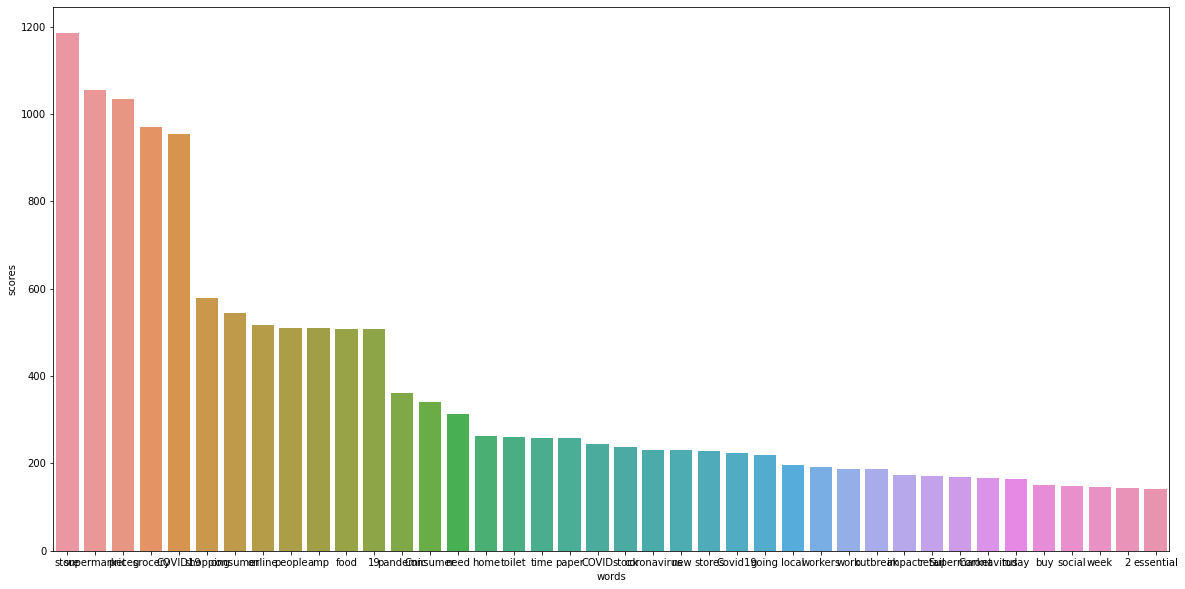

In [ ]:
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)

TRYING ON ANOTHER WAY BY USING WORD CLOUD

In [ ]:
### Word Cloud
from wordcloud import WordCloud

In [ ]:
# CREATING A FUNCTION FOR DATA VIGULATION
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

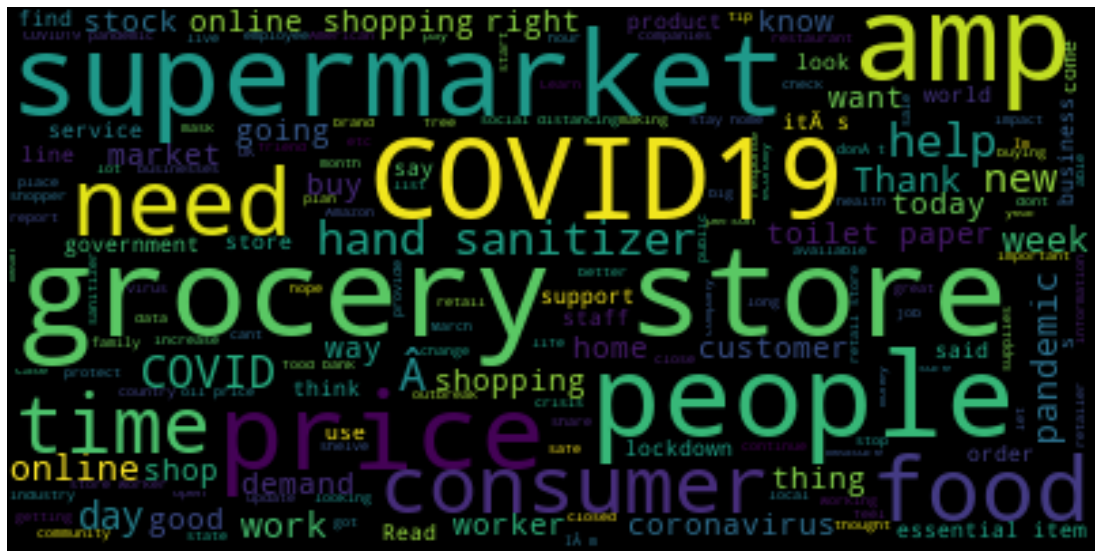

In [ ]:
plot_wordcloud(pos_docx)

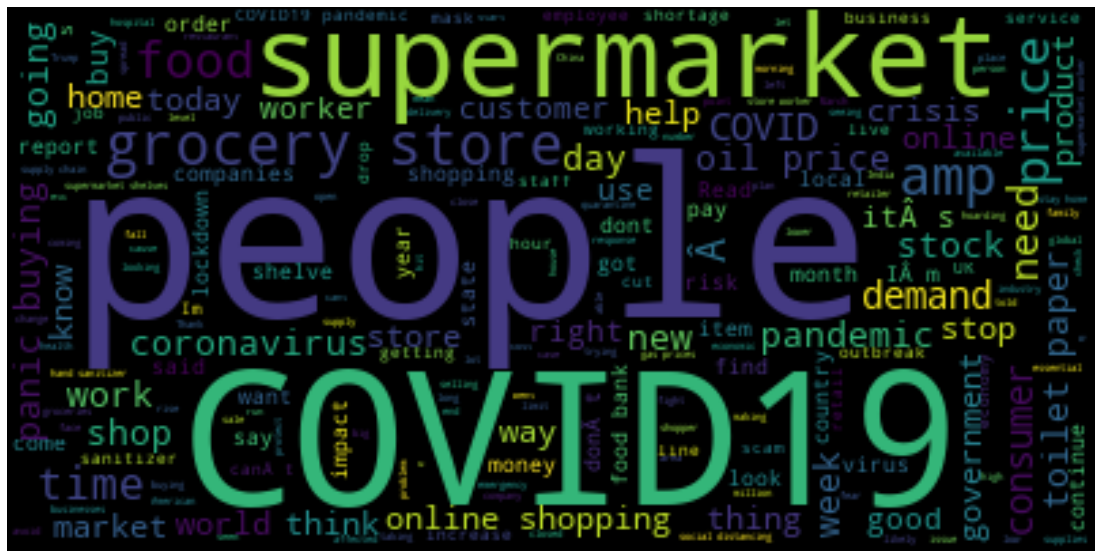

In [ ]:
plot_wordcloud(neg_docx)

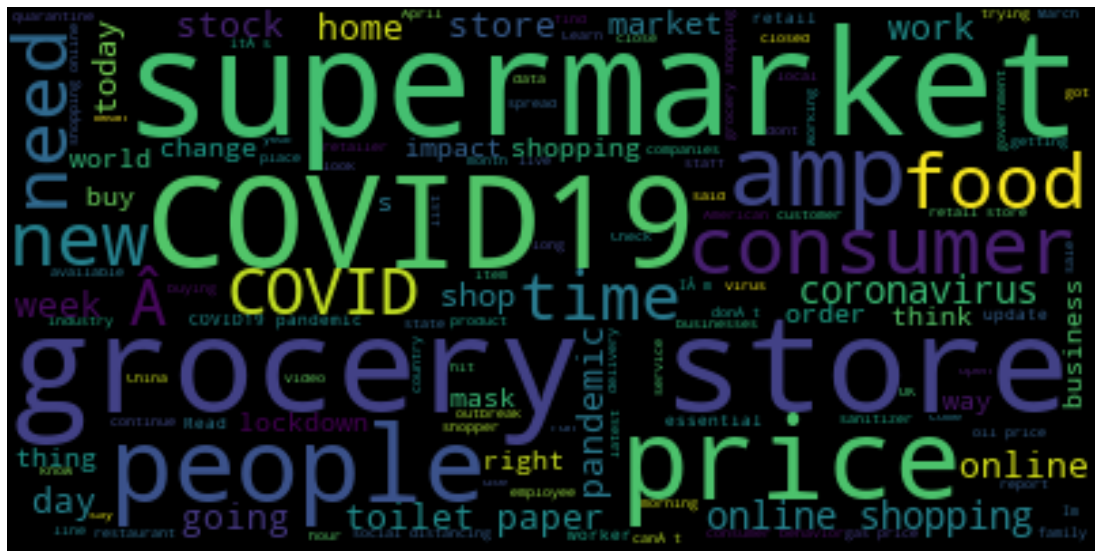

In [ ]:
plot_wordcloud(neu_docx)

## MODEL TRAINING

In [ ]:
clean_tweet = df['clean_tweet'] 

In [ ]:
#one hot encoding
sentiment_map = {"Extremely Negative":-1, "Negative":-1,"Neutral":0, "Positive":1,"Extremely Positive":1}
df['Sentiment'] = df['Sentiment'].map(sentiment_map)

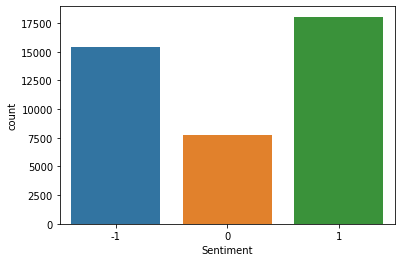

In [ ]:
sns.countplot(x='Sentiment', data=df)

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
new_df = df #To protect the data frem we created new data frem as copy

In [ ]:
new_df.head(1)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,extracted_hashtags,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,[],and and


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df['clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                    [ ,  , n,  ,  , n,  ]
1        [v, c, e,  , T, l, k,  ,  , u, r,  , n, e, g, ...
2        [C, r, n, v, r, u,  , A, u, r, l, :,  , W, l, ...
3        [M,  , f,  , c, k,  ,  , n,  , h, e,  , n, l, ...
4        [M, e,  , r, e,  ,  , g,  ,  , u, p, e, r, r, ...
                               ...                        
41152    [A, r, l, n, e,  , p, l,  , f, f, e, r, n, g, ...
41153    [R, e, p, n, e,  ,  , c, p, l, n,  , n,  , p, ...
41154    [Y, u,  , k, n, w,  , Â, ,  , g, e, n, g,  , ...
41155    [I,  ,  , w, r, n, g,  , h,  , h, e,  , e, l, ...
41156    [ , W, e, l, l,  , n, e, w, /, u, e,  , R, f, ...
Name: clean_tweet, Length: 41157, dtype: object

In [ ]:
ps=PorterStemmer()
lem=WordNetLemmatizer()

In [ ]:
corpus=[]
for i in range(0,len(new_df)):
  review=re.sub('[^a-zA-Z]'," ",new_df['clean_tweet'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
  review=" ".join(review)
  corpus.append(review)

In [ ]:
new_df1 = new_df[['clean_tweet', 'Sentiment']]
new_df1.shape

(41157, 2)

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(new_df1,test_size = 0.2,random_state=24,stratify = new_df1.Sentiment.values) 
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


## Use Of Counter Vectorizer For Multi Class Classification for the best accuracy 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_tweet.values)
X_test = vectorizer.transform(test.clean_tweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 35089)
X_test.shape :  (8232, 35089)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


# Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8111769172361427
Validation accuracy Score :  0.673712342079689
              precision    recall  f1-score   support

          -1       0.74      0.68      0.71      3348
           0       0.21      0.72      0.32       442
           1       0.82      0.66      0.73      4442

    accuracy                           0.67      8232
   macro avg       0.59      0.69      0.59      8232
weighted avg       0.75      0.67      0.70      8232



In [ ]:
mlb = MultinomialNB()
mlb.fit(X_train,y_train)
y_pred=mlb.predict(X_test)
cross_val_score(mlb,X_train,y_train,cv=10,scoring='accuracy').mean()

0.6824298772129399

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf=accuracy_score(y_test,Y_pred_rf)
accuracy_rf

0.7854713313896987

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9997873955960517
Validation accuracy Score :  0.783041788143829
              precision    recall  f1-score   support

          -1       0.73      0.82      0.77      2749
           0       0.78      0.69      0.73      1743
           1       0.83      0.80      0.82      3740

    accuracy                           0.78      8232
   macro avg       0.78      0.77      0.77      8232
weighted avg       0.79      0.78      0.78      8232



# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.971450265755505
Validation accuracy Score :  0.8182701652089407
              precision    recall  f1-score   support

          -1       0.81      0.83      0.82      3011
           0       0.76      0.72      0.74      1622
           1       0.85      0.85      0.85      3599

    accuracy                           0.82      8232
   macro avg       0.81      0.80      0.80      8232
weighted avg       0.82      0.82      0.82      8232



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XG BOOST( BINARY CLASSIFICATION)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.6111769172361428
Validation accuracy Score :  0.6045918367346939
              precision    recall  f1-score   support

          -1       0.60      0.71      0.65      2613
           0       0.00      1.00      0.00         1
           1       0.86      0.56      0.68      5618

    accuracy                           0.60      8232
   macro avg       0.49      0.76      0.44      8232
weighted avg       0.78      0.60      0.67      8232



## SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9483371298405467
Validation accuracy Score :  0.7874149659863946
              precision    recall  f1-score   support

          -1       0.78      0.80      0.79      2970
           0       0.71      0.70      0.70      1560
           1       0.83      0.81      0.82      3702

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



# Winning model

## Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9516173120728929
Validation accuracy Score :  0.8362487852283771
              precision    recall  f1-score   support

          -1       0.82      0.85      0.83      2987
           0       0.81      0.75      0.78      1660
           1       0.86      0.87      0.86      3585

    accuracy                           0.84      8232
   macro avg       0.83      0.82      0.83      8232
weighted avg       0.84      0.84      0.84      8232



In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_test)

[[11686   250   382]
 [  247  5695   228]
 [  326   160 13951]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

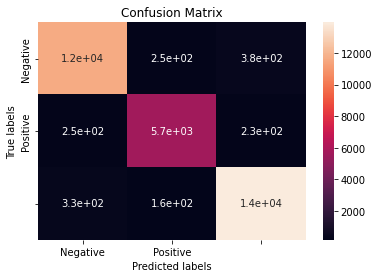

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_test)

score =accuracy_score(y_test,y_pred)
print('accuracy is', score)

accuracy is 0.8362487852283771


In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_test,y_test)
print('scikit score:', scikit_score)

scikit score: 0.8362487852283771


In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_test,y_pred)

array([[2531,  216,  333],
       [ 144, 1250,  149],
       [ 312,  194, 3103]])

## EVALUATION OF ALL BINARY CLASSIFICATION MODELS

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost',],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.836249
1,Logistic Regression,0.818270
0,Support Vector Machines,0.787415
2,Random Forest,0.783042
3,Naive Bayes,0.673712
5,XGBoost,0.604592


# Concluson

We focused on sentiment analysis for sentence labelling. We described
the preprocessing steps, and pipeline steps within which text
normalization and model cross-validation is included, and performance
has been measured using balanced accuracy, f1 score etc. We used
“Stemming” instead of Lemmatization to reduce dimensions, for the same
reason we haven’t tried tf-idf or term frequency vectorizer. We
concentrated on feeding our model with word count information. We
assume, in the case of binary classification, we can further improve this
score.